## Observations and Insights 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # count occurrences of grouped columns (Mouse ID and Timepoint)
# count_series_before = study_results.groupby(['Mouse ID', 'Timepoint']).size()
# count_series_before = count_series_before.to_frame(name = 'size').reset_index()
# count_series_before.sort_values(by='size', ascending=False).head(20)

In [17]:
# Combine the data into a single dataset
unrefined_merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merge_df = unrefined_merge_df.rename(columns={"Age_months":"Age (Months)"})

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (Months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [18]:
# count occurrences of grouped columns (Mouse ID and Timepoint)
count_series_before = merge_df.groupby(['Mouse ID', 'Timepoint']).size()
count_series_before = count_series_before.to_frame(name = 'size').reset_index()
count_series_before.sort_values(by='size', ascending=False).head(10)

,Mouse ID,Timepoint,size
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2
0,a203,0,1
1264,q633,0,1
1260,q610,20,1
1261,q610,25,1
1262,q610,30,1


In [19]:
# Remove Mouse ID - Timepoint groups with more than one occurence
# remove_groups = merge_df.groupby(['Mouse ID', 'Timepoint'])
# merge_df = remove_groups.filter(lambda x: x == 1)

merge_df = merge_df[merge_df['Mouse ID'] != 'g989']

merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (Months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimens_df = merge_df.groupby(['Drug Regimen'])
grouped_regimens_df.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age (Months),Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [21]:
tv_mean = grouped_regimens_df['Tumor Volume (mm3)'].mean()
# print(tv_mean)

tv_median = grouped_regimens_df['Tumor Volume (mm3)'].median()
# print(tv_median)

tv_var = grouped_regimens_df['Tumor Volume (mm3)'].var()
# print(tv_var)

tv_std = grouped_regimens_df['Tumor Volume (mm3)'].std()
# print(tv_std)

tv_sem = grouped_regimens_df['Tumor Volume (mm3)'].sem()
# print(tv_std)

summary_df = pd.DataFrame({'Mean': tv_mean,
                          'Median': tv_median,
                          'Variance': tv_var,
                          'Std. Dev.': tv_std,
                          'SEM': tv_sem})

summary_df.reset_index()

summary_df.index.name=None

summary_df

,Mean,Median,Variance,Std. Dev.,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_counts = merge_df['Drug Regimen'].value_counts()

regimen_counts_df = pd.DataFrame({'Count of Measurements': regimen_counts})
regimen_counts_df = regimen_counts_df.reset_index()
regimen_counts_df = regimen_counts_df.rename(columns={'index': 'Regimen'})

regimen_counts_df

,Regimen,Count of Measurements
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

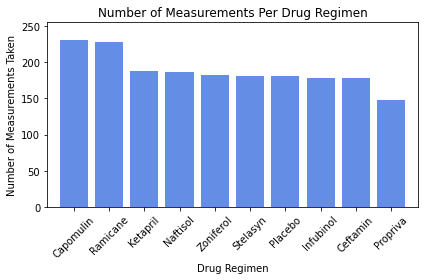

In [25]:
x_axis = np.arange(len(regimens_counts_df))
tick_locations = [value for value in x_axis]
x_regimen = regimen_counts_df['Regimen']
# regimens

y_regimen_counts = regimen_counts_df['Count of Measurements']
# regimen_counts

plt.bar(x_axis, y_regimen_counts, color='#648DE5')
plt.xlim(-0.75, len(x_regimen)-0.25)
plt.ylim(0, max(y_regimen_counts)+25)
plt.title('Number of Measurements Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements Taken')
plt.xticks(tick_locations, x_regimen, rotation='45')
plt.tight_layout()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
